In [1]:
%run dataframe.ipynb

Host Shape: rows: 4816389 and columns: 29
Summary Shape: rows: 2611 and columns: 33
EvtWarn Shape: rows: 39992 and columns: 36
RvBsm Shape: rows: 491 and columns: 18
Spat Shape: rows: 19389 and columns: 11
Headlamp: {0, 2, 3, -1}
Wiper: {0, 1, 2, 3, -1}
Turn Signal: {0, 1, 2, -1}
Stability Control Status: {0, -1}
Transition State: {0, 1, 2, 3, -1}
Traction Control Status: {0, 1, -2, -7, -6, -4, -3, -1}
Brake Status: {0, 1, -1}
Speed: 1000.0
Yaw Rate: 1000.0
No. of -1s in Headlamp :  43317
No. of -1s in Wiper :  43317
No. of -1s in Turn Signal :  43317
No. of -1s in Stability Control Status :  43317
No. of <0s in Transition State :  43317
No. of -1s in Headlamp :  43317
No. of -1s in Headlamp :  43317
No. of Speed at 1,000 :  43317
No. of Yaw Rate at 1,000 :  43317
No. of -1s in Headlamp :  0
No. of -1s in Wiper :  0
No. of -1s in Turn Signal :  0
No. of -1s in Stability Control Status :  0
No. of <0s in Transition State :  0
No. of -1s in Headlamp :  0
No. of -1s in Headlamp :  0
No. o

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df_host_subset = df_host.sample(n=1000000)

In [4]:
# standardizing the data
scaler = StandardScaler()
df_host_subset_scaled = scaler.fit_transform(df_host_subset)

# statistics of scaled data
pd.DataFrame(df_host_subset_scaled).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.420384,0.724378,-0.307376,-0.478049,0.0,-0.003162,0.260462,-0.257046,-0.378373,-0.082955
1,-0.420384,0.552766,-0.307376,0.990620,0.0,-0.003162,0.260462,-0.257046,-0.378373,-0.221824
2,-0.420384,0.888949,-0.307376,0.855411,0.0,-0.003162,0.260462,-0.257046,-0.378373,-0.013521
3,-0.420384,-0.593074,3.123846,0.398737,0.0,-0.003162,0.260462,-0.257046,-0.378373,0.125348
4,-0.420384,-1.039265,-0.307376,-1.185135,0.0,-0.003162,0.260462,2.371554,-0.378373,-2.027116


In [5]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
silhouette_coefficients = []
for cluster in range(2,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_host_subset_scaled)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

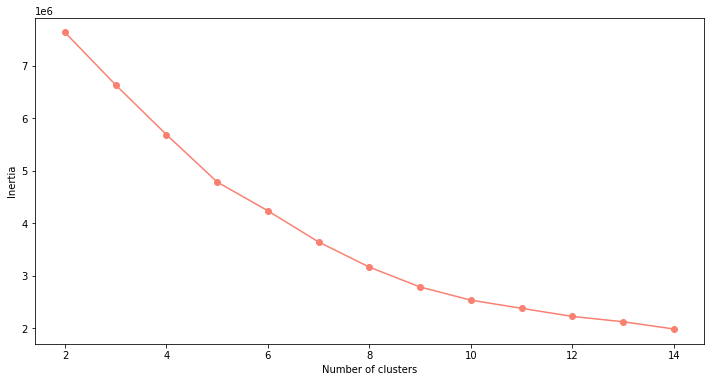

In [6]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', color="salmon")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [7]:
# silhouette_coefficients = []
# for cluster in range(2,15):
#     kmeans = KMeans(n_clusters = cluster, init='k-means++')
#     kmeans.fit(df_host_subset_scaled)
#     cluster_labels = kmeans.fit_predict(df_host_subset_scaled)
#     score = silhouette_score(df_host_subset_scaled, cluster_labels)
#     silhouette_coefficients.append(score)

In [8]:
# # converting the results into a dataframe and plotting them
# frame2 = pd.DataFrame({'Cluster':range(2,15), 'Silhouette Score':silhouette_coefficients})
# plt.figure(figsize=(12,6))
# plt.plot(frame2['Cluster'], frame2['Silhouette Score'], marker='o', color="salmon")
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')

In [9]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_host_subset_scaled)

KMeans(n_clusters=5)

In [11]:
predict = kmeans.predict(df_host_subset_scaled)
df_host_subset['Predicted Cluster'] = pd.Series(predict, index=df_host_subset.index)


,brakestatus,device,headlamp,speed,stabilitycontrolstatus,traccontrolstatus,transstate,turnsignal,wiper,yawrate,Predicted Cluster
3296208,0,102629,0,14.441666,0,0,2,0,0,-0.244156,3
883606,0,102434,0,32.183334,0,0,2,0,0,-0.732437,3
3933072,0,102816,0,30.550000,0,0,2,0,0,-0.000015,3
673186,0,101132,2,25.033333,0,0,2,0,0,0.488266,3
2041270,0,100625,0,5.900000,0,0,2,1,0,-7.080093,1


In [12]:
df_host_subset.to_csv('kmeans_df_host_subset_with_clusters.csv')